In [1]:
import pandas as pd
import seaborn as sb
import missingno as ms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv('hour_train.csv')

In [3]:
data.shape

(13949, 17)

In [4]:
print(data.shape)

(13949, 17)


In [5]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# remove unnecessary features

drop_features = { "instant","dteday"}

data= data.drop(columns= drop_features)

In [7]:
data.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
data.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
categorical_features = {"season","yr","mnth","hr","holiday","weekday","workingday","weathersit"}

for feature in categorical_features:
    data[feature] = data[feature].astype("category")

In [10]:
data.dtypes


season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

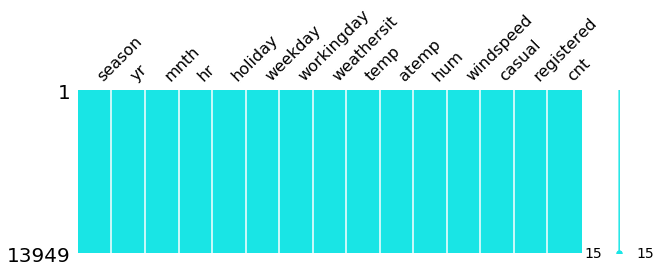

In [11]:
print(data.isnull().sum())
ms.matrix(data,figsize = (10,3),color = (0.1,0.9,0.9))
data.dtypes


In [12]:
data['temp'].describe()


count    13949.000000
mean         0.499973
std          0.197901
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

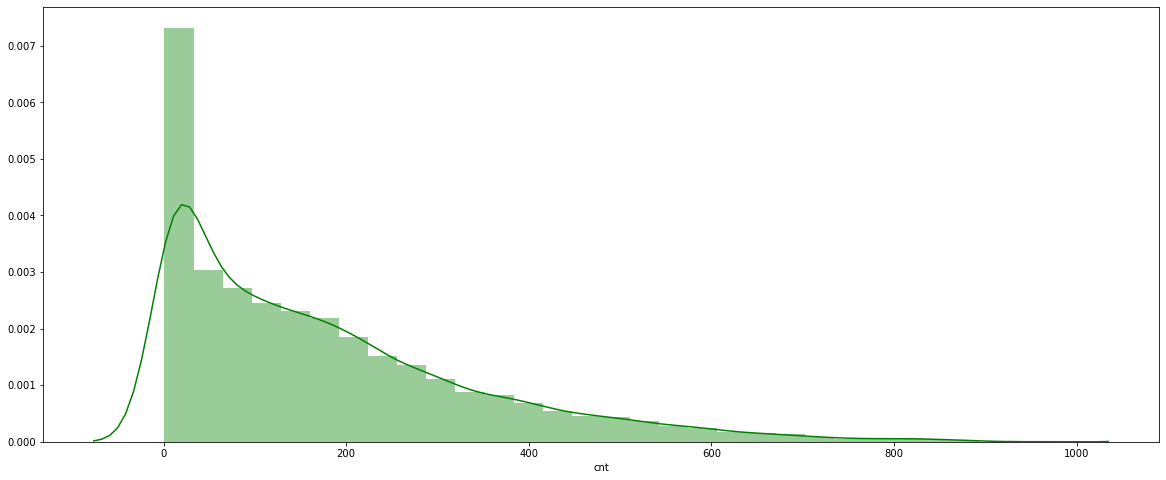

In [13]:
plt.figure(figsize=(20, 8))
sb.distplot(data['cnt'], color='g', bins=30, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CB6809808>,
      dtype=object)

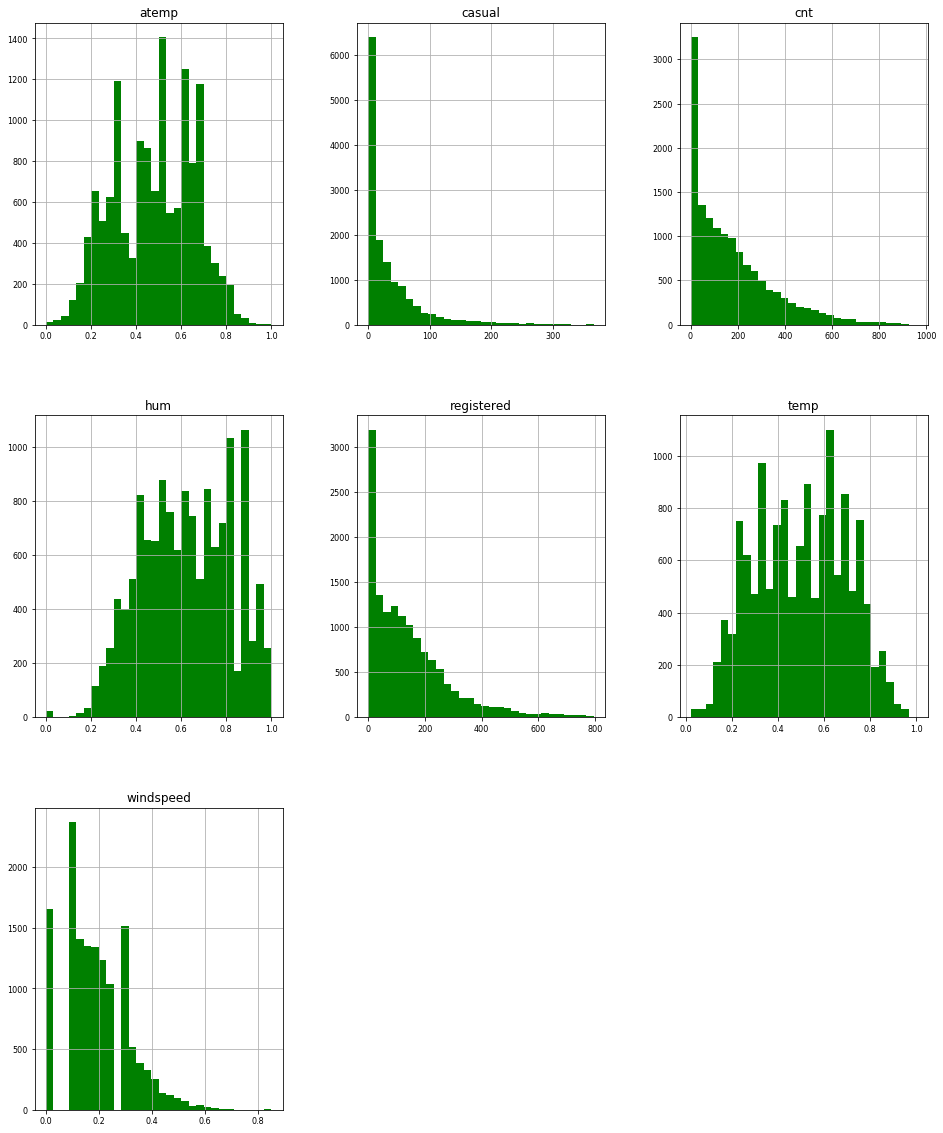

In [14]:
numerical_fetures = data.select_dtypes(include = ['float64', 'int64'])
numerical_fetures.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

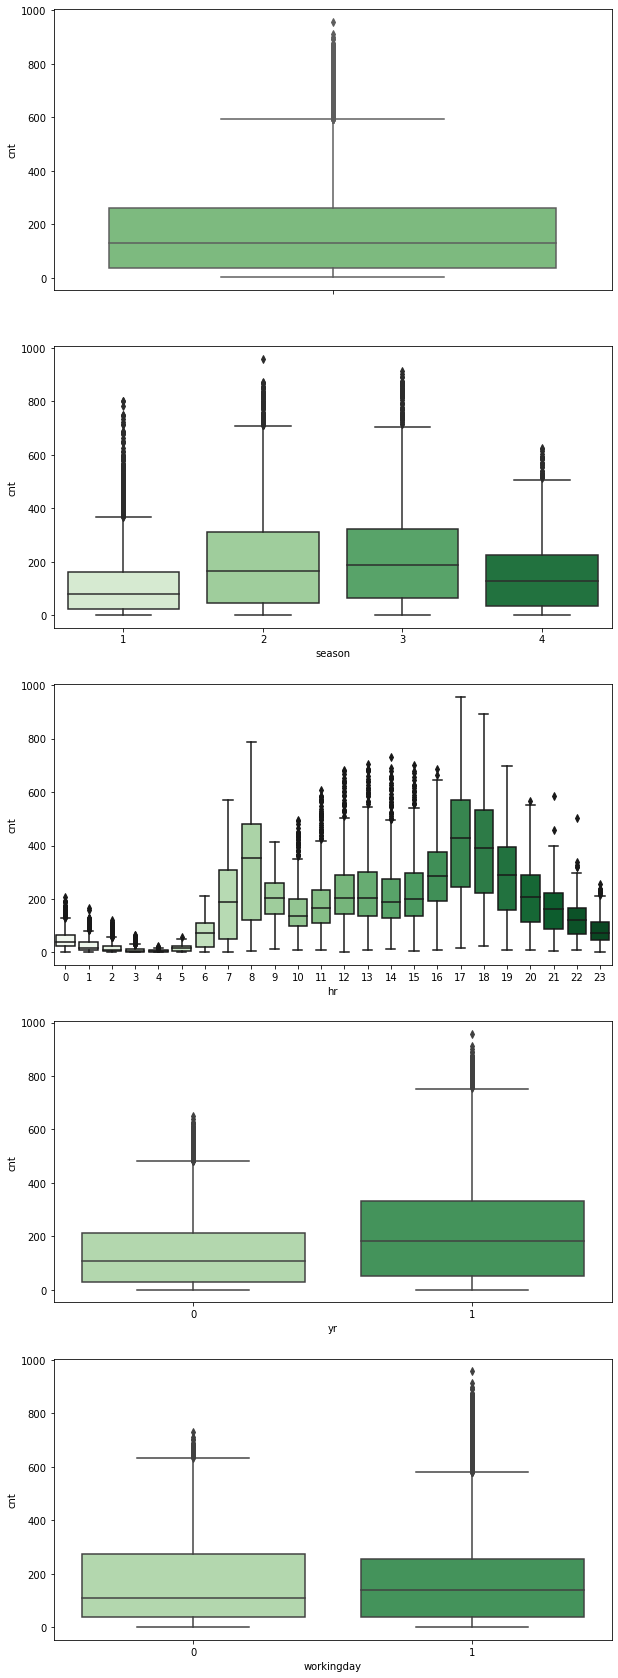

In [15]:
fig, axes = plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="cnt",orient="v",ax=axes[0], palette="Greens")
sb.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[1], palette="Greens")
sb.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2], palette="Greens")
sb.boxplot(data=data,y="cnt",x="yr",orient="v",ax=axes[3], palette="Greens")
sb.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[4], palette="Greens")

In [16]:
data[['cnt', 'registered']].head()

,cnt,registered
0,16,13
1,40,32
2,32,27
3,13,10
4,1,1


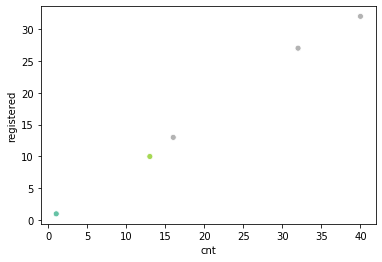

In [17]:
sb.scatterplot(data['cnt'].head(), data['registered'].head(), hue=data['cnt'], legend=False, palette="Set2")

C:\Users\sunee\Anaconda31\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


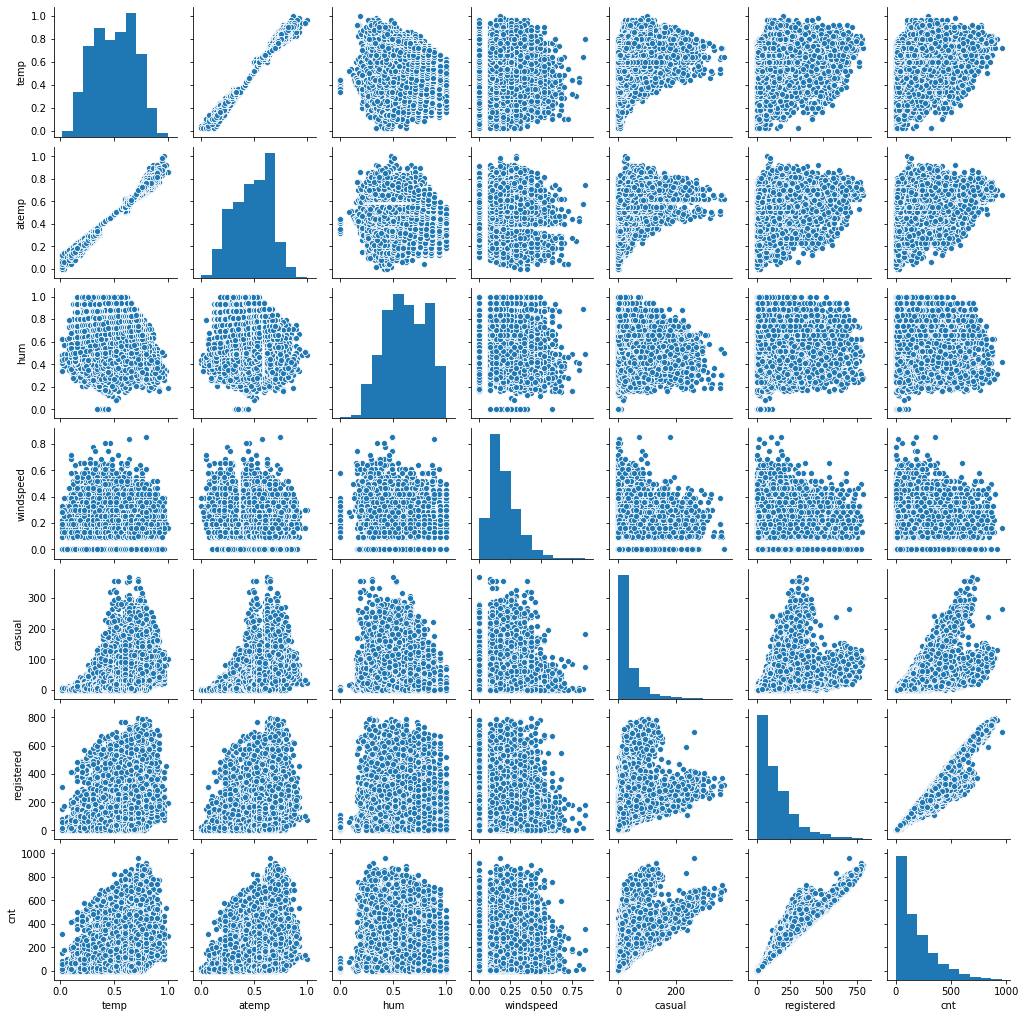

In [18]:
sb.pairplot(numerical_fetures, size=2)

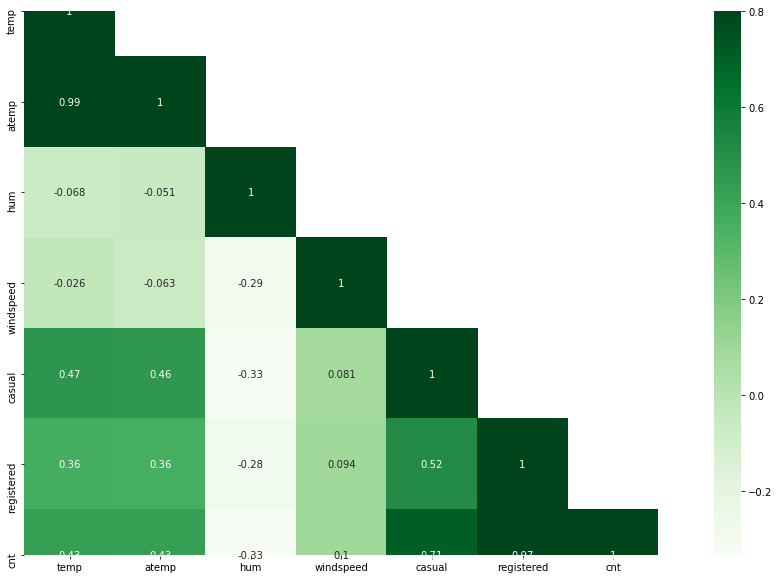

In [19]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)